## The goal of the assignment is to categorise the countries using some socio-economic and health factors that determine the overall development of the country and make suggetions  CEO of the NGO HELP on which countires are in most need for funding. 

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import datetime as st

In [239]:
import warnings
warnings.filterwarnings("ignore")

dataframe interpretation
df : data from CSV
data : data with out the top outliers
df_top: dataframe of top outliers
df_PCA:dataframe with principle components

### Importing the data set and EDA

In [240]:
df=pd.read_csv("Country-data.csv")

In [241]:
df.shape #checking the size of the data

(167, 10)

In [242]:
df.head() #checking he columns

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [243]:
df.info()# checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [244]:
df.isnull().sum()/len(df)#checking missing values

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [245]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [246]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

## checking for outliers

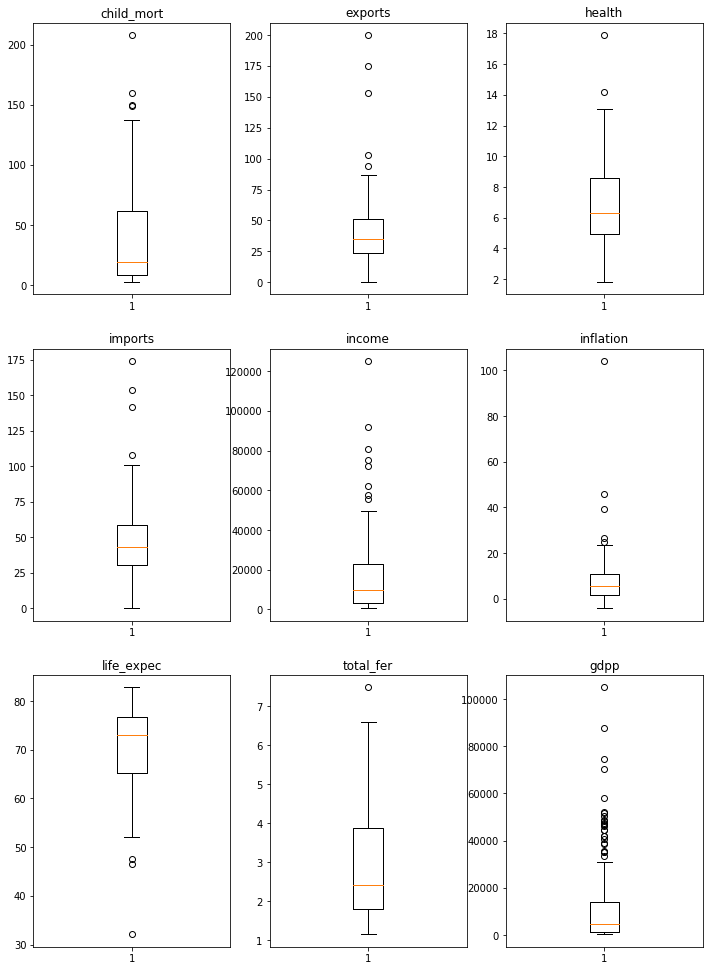

In [247]:
counter =1
for i in df.columns[1:]:
    plt.subplot(3,3,counter)
    plt.rcParams["figure.figsize"] = [12,17]
    plt.boxplot(df[i])
    plt.title(i)
    counter = counter + 1

In [248]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [249]:
df_2=df[(df['exports']>df['exports'].quantile(0.25)) & (df['exports']<df['exports'].quantile(0.75))]

In [250]:
df_2=df[(df['health']>df['health'].quantile(0.25)) & (df['health']<df['health'].quantile(0.75))]

In [251]:
df_2=df[(df['income']>df['income'].quantile(0.25))]

In [252]:
df_2=df[(df['gdpp']>df['gdpp'].quantile(0.25))]

In [253]:
df_2=df[(df['imports']>df['imports'].quantile(0.25)) & (df['imports']<df['imports'].quantile(0.75))]

In [254]:
df_2=df[(df['inflation']>df['inflation'].quantile(0.25)) & (df['inflation']<df['inflation'].quantile(0.75))]

In [255]:
df_2=df[(df['total_fer']>df['total_fer'].quantile(0.25)) & (df['total_fer']<df['total_fer'].quantile(0.75))]

In [256]:
df_2=df[df['child_mort']>df['child_mort'].quantile(0.25)]

In [257]:
df_2["country"]=df["country"]

In [258]:
df_2.describe()

child_mort     exports     health     imports         income  \
count  125.000000  125.000000  125.00000  125.000000     125.000000   
mean    49.504000   36.021592    6.03312   44.228527   11187.544000   
std     40.874166   19.412551    2.38488   19.364206   16503.983768   
min      8.600000    0.109000    1.81000    0.065900     609.000000   
25%     17.200000   22.200000    4.48000   29.600000    2440.000000   
50%     33.500000   31.700000    5.60000   43.000000    6700.000000   
75%     74.700000   49.300000    7.09000   57.100000   13300.000000   
max    208.000000   93.800000   14.20000  108.000000  125000.000000   

        inflation  life_expec   total_fer          gdpp  
count  125.000000  125.000000  125.000000    125.000000  
mean     9.750816   67.706400    3.379600   5808.912000  
std     11.452792    8.383776    1.509677   9023.921413  
min     -4.210000   32.100000    1.270000    231.000000  
25%      3.680000   61.700000    2.170000   1000.000000  
50%      7.040000   69.200000    2.830000   2990.000000  
75%     13.400000   74.400000    4.670000   6840.000000  
max    104.000000   80.400000    7.490000  70300.000000

## After looking at the outliers and considering the goal of the task
1. I removed the top outliers for income and gdpp as we need countries at the lower economic conditions
2. I removed the bottom outliers for child mortality as we need the countries with higer child mortality 
3. and removed outliers for the rest of the columns

In [259]:
df_2.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [260]:
df_2.describe()

child_mort     exports     health     imports         income  \
count  125.000000  125.000000  125.00000  125.000000     125.000000   
mean    49.504000   36.021592    6.03312   44.228527   11187.544000   
std     40.874166   19.412551    2.38488   19.364206   16503.983768   
min      8.600000    0.109000    1.81000    0.065900     609.000000   
25%     17.200000   22.200000    4.48000   29.600000    2440.000000   
50%     33.500000   31.700000    5.60000   43.000000    6700.000000   
75%     74.700000   49.300000    7.09000   57.100000   13300.000000   
max    208.000000   93.800000   14.20000  108.000000  125000.000000   

        inflation  life_expec   total_fer          gdpp  
count  125.000000  125.000000  125.000000    125.000000  
mean     9.750816   67.706400    3.379600   5808.912000  
std     11.452792    8.383776    1.509677   9023.921413  
min     -4.210000   32.100000    1.270000    231.000000  
25%      3.680000   61.700000    2.170000   1000.000000  
50%      7.040000   69.200000    2.830000   2990.000000  
75%     13.400000   74.400000    4.670000   6840.000000  
max    104.000000   80.400000    7.490000  70300.000000

Text(0.5, 0.98, 'Co-relation matrix for the dataframe')

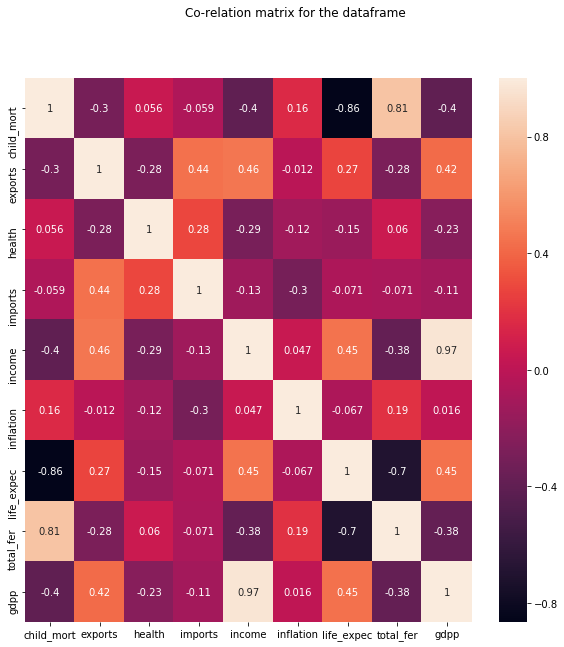

In [261]:
plt.figure(figsize = (10,10) )
sns.heatmap(df_2.corr() , annot = True)
plt.suptitle('Co-relation matrix for the dataframe')

### The high correlation between variables needs to be addressed so let's use PCA to reduce the dimentions and not loosing too much information

## Standardize the data for PCA

# Principle component analysis

In [262]:
## Remove the index, which is the country in order to perform PCA
country=df_2.pop("country")

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
scaler = StandardScaler() #instantiate a scaler

In [265]:
X = df_2.copy()

### Apply the scaler to the copied DF

In [266]:
x = scaler.fit_transform(X)

In [267]:
x[:5,:5]# the data after transformation

array([[ 9.99647719e-01, -1.34584619e+00,  6.51229898e-01,
         3.48155206e-02, -5.82652390e-01],
       [-8.08246721e-01, -4.14879651e-01,  2.17604281e-01,
         2.26658625e-01, -7.65030175e-02],
       [-5.45414241e-01,  1.23012125e-01, -7.84365593e-01,
        -6.65152561e-01,  1.04177708e-01],
       [ 1.70708467e+00,  1.35912880e+00, -1.34007998e+00,
        -6.88834545e-02, -3.21669120e-01],
       [-9.62998554e-01,  4.90226704e-01, -1.31350672e-03,
         7.60708346e-01,  4.81356326e-01]])

In [268]:
from sklearn.decomposition import PCA

In [269]:
pca = PCA(random_state=50)# create an instance for principle component Analysis

In [270]:
pca.fit(x) # fit pCA on the data 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
    svd_solver='auto', tol=0.0, whiten=False)

In [271]:
pca.components_ #the principle components

array([[-0.43501893,  0.29449457, -0.15246246,  0.01031158,  0.41840988,
        -0.05332776,  0.43210329, -0.407416  ,  0.41239378],
       [ 0.24002957, -0.06701735, -0.42530726, -0.54758414,  0.3006764 ,
         0.46784672, -0.10801586,  0.24914994,  0.27226801],
       [ 0.29661566,  0.59842236, -0.12959926,  0.52419645,  0.21637781,
        -0.04116431, -0.32261272,  0.26468825,  0.19919653],
       [ 0.14409069, -0.30645835,  0.63651164, -0.08837841,  0.38839369,
        -0.26029043, -0.16116457,  0.11506449,  0.46319403],
       [-0.1003217 ,  0.13725926,  0.50909621,  0.18401063, -0.02665586,
         0.81632477,  0.098534  , -0.02929842, -0.01981358],
       [ 0.15521591, -0.1305556 , -0.08948047,  0.0597578 ,  0.04443315,
         0.12670367, -0.57214155, -0.77535319,  0.02718195],
       [-0.05246511, -0.64730488, -0.32206789,  0.61456521,  0.11482396,
         0.16056357,  0.13370405,  0.12271746,  0.1578738 ],
       [ 0.77939478,  0.01433383,  0.03890218,  0.04424414, -0

In [272]:
pca.explained_variance_ratio_ # Determine the ratio of the variance explained by each principle component

array([0.40385169, 0.1884558 , 0.14853529, 0.09506768, 0.09128341,
       0.03230241, 0.02587484, 0.01155235, 0.00307653])

In [273]:
import matplotlib.pyplot as plt #Visualize the variance ratio


<BarContainer object of 9 artists>

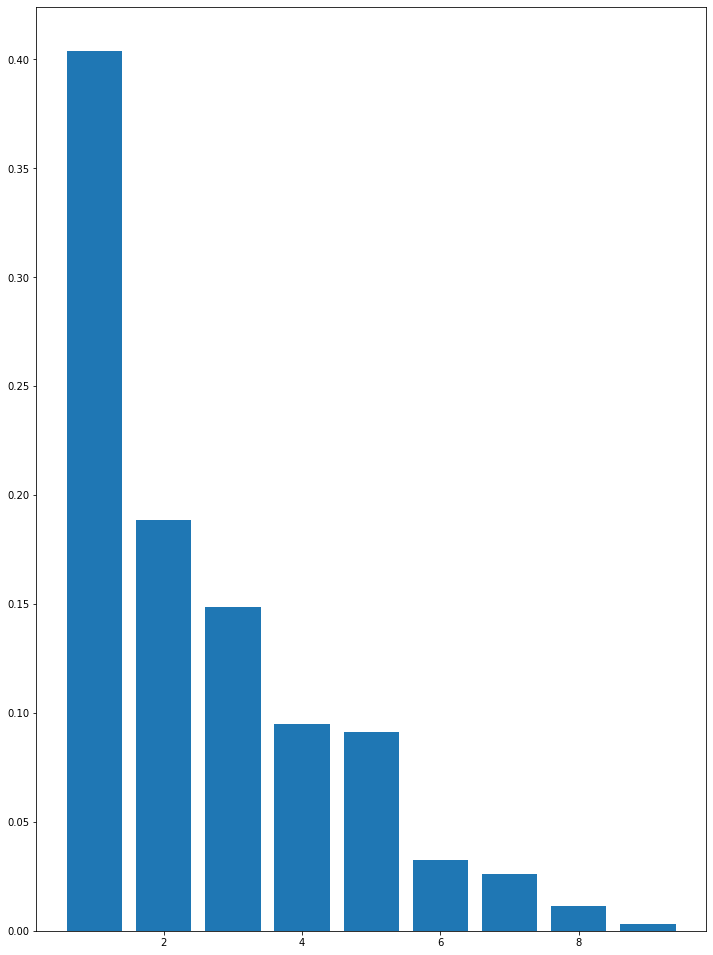

In [274]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [275]:
var_cumu = np.cumsum(pca.explained_variance_ratio_) #Determiing the cumulative sum of the principle componets to 
#find the minimum number of components that explain most of the variance

In [276]:
var_cumu 

array([0.40385169, 0.59230748, 0.74084277, 0.83591045, 0.92719386,
       0.95949628, 0.98537112, 0.99692347, 1.        ])

### Making the scree plot to determine how many principle components need to be considered for the analysis

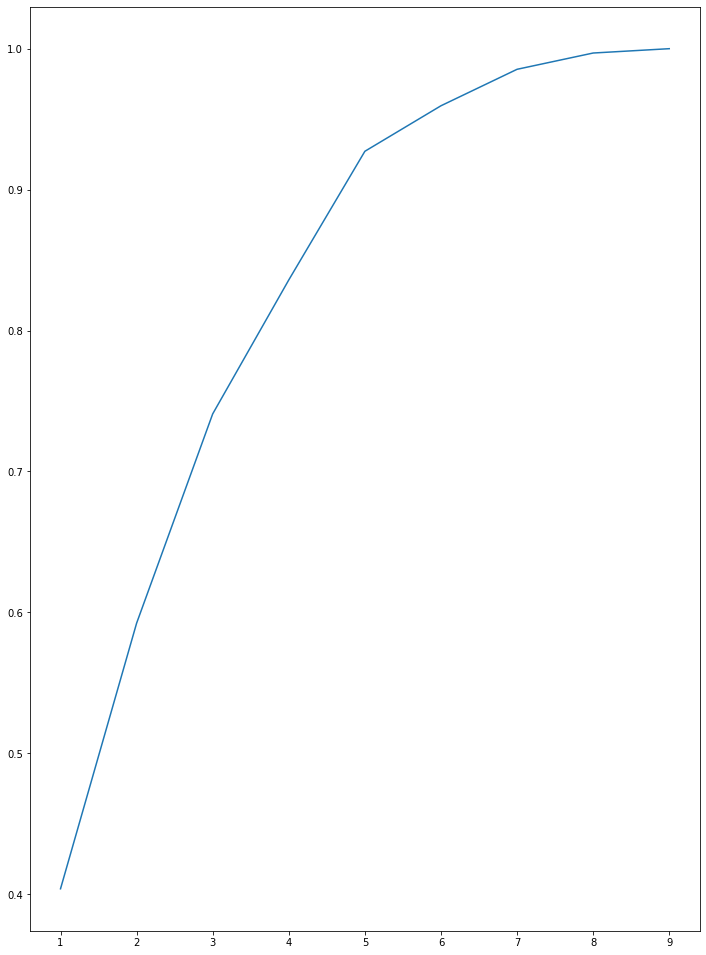

In [277]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### From th Scree plot and the cumulative variance we see that 5 components explain about 93% of the variance, we will consider 5 principle componentsto perform culstering

In [278]:
pc2 = PCA(n_components=5, random_state=50)#Using the principle components to apply PCA

In [279]:
newdata = pc2.fit_transform(x)

In [280]:
newdata.shape

(125, 5)

Making a dataframe from the principle components


In [281]:
df_PCA= pd.DataFrame(newdata, columns=["PC1", "PC2","PC3", "PC4","PC5"])
df_PCA.shape

(125, 5)

Text(0.5, 0.98, 'Principle compontents correlation')

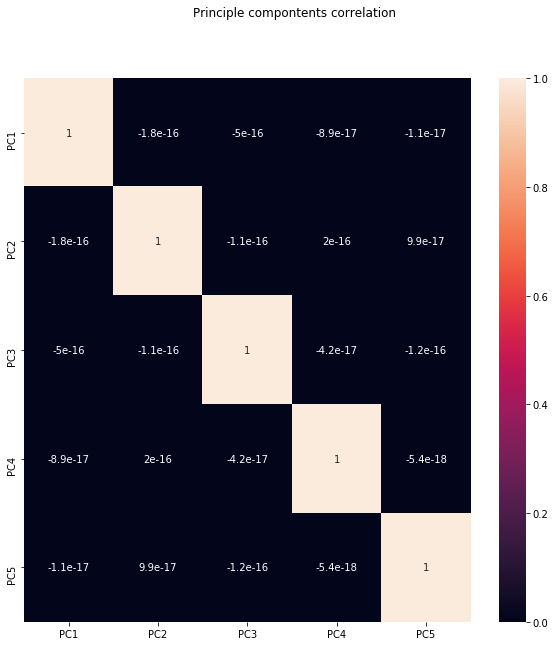

In [282]:
plt.figure(figsize = (10,10) )
sns.heatmap(df_PCA.corr() , annot = True)
plt.suptitle('Principle compontents correlation')

### we have reduced the dimentions of the dataframe by 45% which will reduce multi-collinearity and improve the performance of the model
### we will now run the principle componets through the clustering algorithms to zero upon a cluster of countries from which we can pick our five countries

### The above heatmap shows that the correlation is completely eleminated

In [283]:
df_Hie=df_PCA.copy() #dataframe to perform Hierarchical clustering later

In [288]:
df_final = pd.concat([df_PCA,df_2 ], axis=1) # adding the countries to the dataframe

In [284]:
df_final.head()

PC1       PC2       PC3       PC4       PC5  child_mort  exports  \
0 -2.670307  0.240164  0.057686  0.886682 -0.125526        90.2     10.0   
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922        16.6     28.0   
2  0.925942  0.614654 -0.791380 -0.937885  0.117766        27.3     38.4   
3 -1.584027  1.838481  2.074809 -1.188870  0.095283       119.0     62.3   
4  1.914003 -1.007210  0.111139  0.077772 -0.186814        10.3     45.5   

   health  imports   income  inflation  life_expec  total_fer     gdpp  
0    7.58     44.9   1610.0       9.44        56.2       5.82    553.0  
1    6.55     48.6   9930.0       4.49        76.3       1.65   4090.0  
2    4.17     31.4  12900.0      16.10        76.5       2.89   4460.0  
3    2.85     42.9   5900.0      22.40        60.1       6.16   3530.0  
4    6.03     58.9  19100.0       1.44        76.8       2.13  12200.0

In [285]:
df_final.dropna().head()

PC1       PC2       PC3       PC4       PC5  child_mort  exports  \
0 -2.670307  0.240164  0.057686  0.886682 -0.125526        90.2     10.0   
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922        16.6     28.0   
2  0.925942  0.614654 -0.791380 -0.937885  0.117766        27.3     38.4   
3 -1.584027  1.838481  2.074809 -1.188870  0.095283       119.0     62.3   
4  1.914003 -1.007210  0.111139  0.077772 -0.186814        10.3     45.5   

   health  imports   income  inflation  life_expec  total_fer     gdpp  
0    7.58     44.9   1610.0       9.44        56.2       5.82    553.0  
1    6.55     48.6   9930.0       4.49        76.3       1.65   4090.0  
2    4.17     31.4  12900.0      16.10        76.5       2.89   4460.0  
3    2.85     42.9   5900.0      22.40        60.1       6.16   3530.0  
4    6.03     58.9  19100.0       1.44        76.8       2.13  12200.0

In [286]:
df_final.shape

(157, 14)

### KMeans Clustering

In [289]:
df_PCA.head()

PC1       PC2       PC3       PC4       PC5
0 -2.670307  0.240164  0.057686  0.886682 -0.125526
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922
2  0.925942  0.614654 -0.791380 -0.937885  0.117766
3 -1.584027  1.838481  2.074809 -1.188870  0.095283
4  1.914003 -1.007210  0.111139  0.077772 -0.186814

### Before we assign the data to clusters we have to determine the probability of the data to form clusters. This probility is is given by Hopikins Score.

In [291]:
#  Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability and 
#a score tending to 0 express a high cluster tendency.
from  pyclustertend import hopkins 
hopkins(df_PCA,125)


0.2152904362553527

## The 0.22Hopkins score indicates pretty good probability of the data to be able to form clusters.

# Modeling

In [292]:
#instantiate a cluster
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(df_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [294]:
df_PCA.shape

(125, 5)

### we need to determine the optimum number of clusters that have maximum distance between the cluster centers and the minimum distacne between the observations within the clusters, we will do this by ploting the elbow-curve ssd and finding the silhouette score to confirm

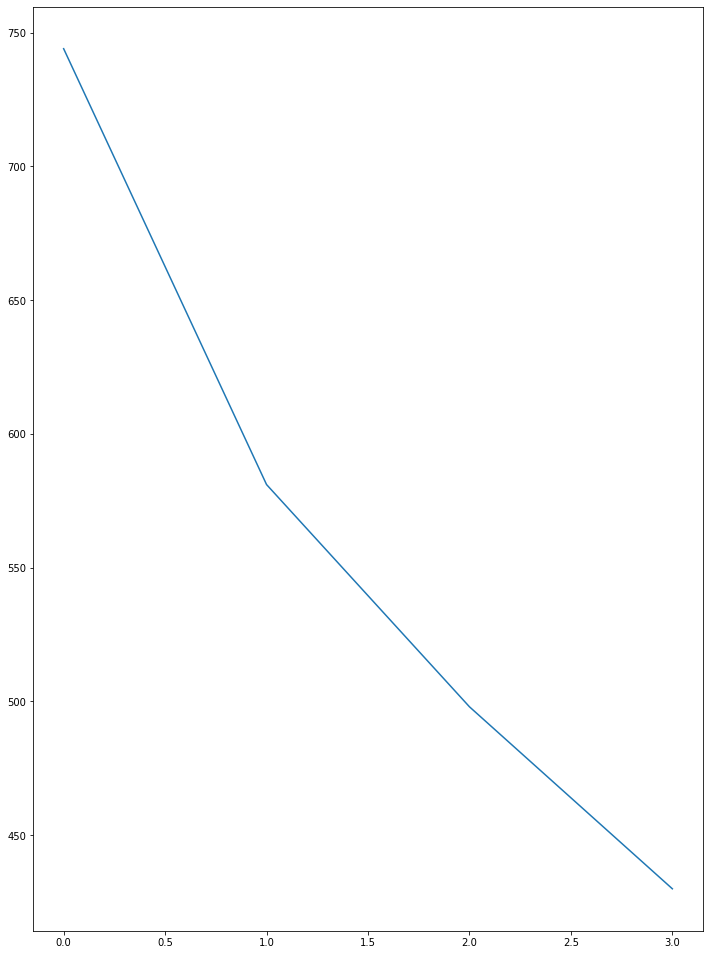

In [296]:
# elbow-curve/SSD
ssd = [] # squared sum of distances
range_n_clusters = [2, 3, 4, 5]
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(df_PCA)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [297]:
ssd # the sum of the square of distance between the observations and the line of bestfit 

[743.9946815421374, 581.0510499443958, 497.9732310898934, 429.93205900807493]

# silhouette analysis

#### silhouetter score is the measure of the goodness of the clustes that we created
####  silhouette score = p-q/max(p,q)
####  p is the mean distacne to the points in the nearest cluster that the data point is not a part of
#### q is the mean intra - cluster distance to all the points in its own cluster.
#### *The caluse of silhouette score is between -1 to 1
#### * A score closer to 1 indicates that the data point is very similar to the data points in the 
#### cluster
#### * A score closer to 1 indicates that the data point is not similar to the data point in the cluster

In [298]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_PCA)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.2946508027937834
For n_clusters=3, the silhouette score is 0.326815276072729
For n_clusters=4, the silhouette score is 0.23618004988514907
For n_clusters=5, the silhouette score is 0.255754072701474


### After trying 2 thru 5 clusters and then both the elbow curve and the silhouette score I decided to go with  3 clusters to be considered for optimization

# Cluster Analysis
I decided to go with three clusters given the size of the data, even though both silhouette score and the elbow curve indicate that two is the optimum number of clusters

In [299]:
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(df_PCA)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [300]:
kmeans.labels_ #we create cluster lables so that we can assign them to the countries later

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [301]:
#Concatenate the numpy arry with the dataframe with the customer id
df_PCA["cluster_id"]=kmeans.labels_
df_PCA.head()

PC1       PC2       PC3       PC4       PC5  cluster_id
0 -2.670307  0.240164  0.057686  0.886682 -0.125526           0
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922           1
2  0.925942  0.614654 -0.791380 -0.937885  0.117766           1
3 -1.584027  1.838481  2.074809 -1.188870  0.095283           0
4  1.914003 -1.007210  0.111139  0.077772 -0.186814           1

Text(0.5, 0.95, 'K-Means Principal components')

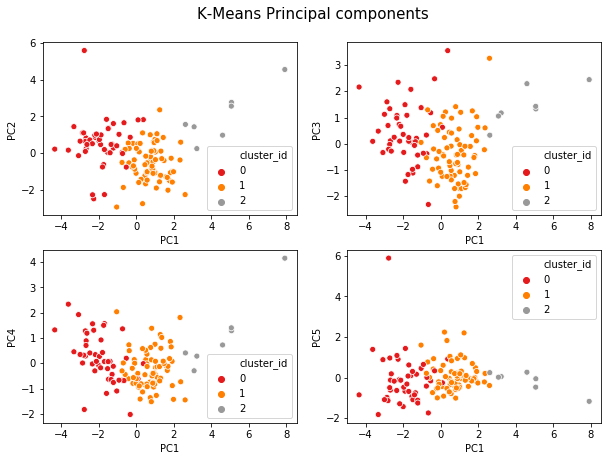

In [302]:
plt.figure(figsize=(10,7))
j=1
kmeans_cols=['PC2','PC3','PC4','PC5']
for i in kmeans_cols:
    plt.subplot(2,2,j)
    sns.scatterplot(df_PCA['PC1'],df_PCA[i],hue=df_PCA['cluster_id'],palette="Set1")
    j+=1
plt.suptitle("K-Means Principal components",y=0.95,fontsize=15)

# Hierarchial clustering 

In [303]:
df_Hie=df_Hie.filter(["PC1","PC2","PC3","PC4","PC5"])

In [304]:
df_Hie.head()

PC1       PC2       PC3       PC4       PC5
0 -2.670307  0.240164  0.057686  0.886682 -0.125526
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922
2  0.925942  0.614654 -0.791380 -0.937885  0.117766
3 -1.584027  1.838481  2.074809 -1.188870  0.095283
4  1.914003 -1.007210  0.111139  0.077772 -0.186814

### single linkage is a metric that uses the minimum distance between two observations to assign them to a cluster.

<function matplotlib.pyplot.show(*args, **kw)>

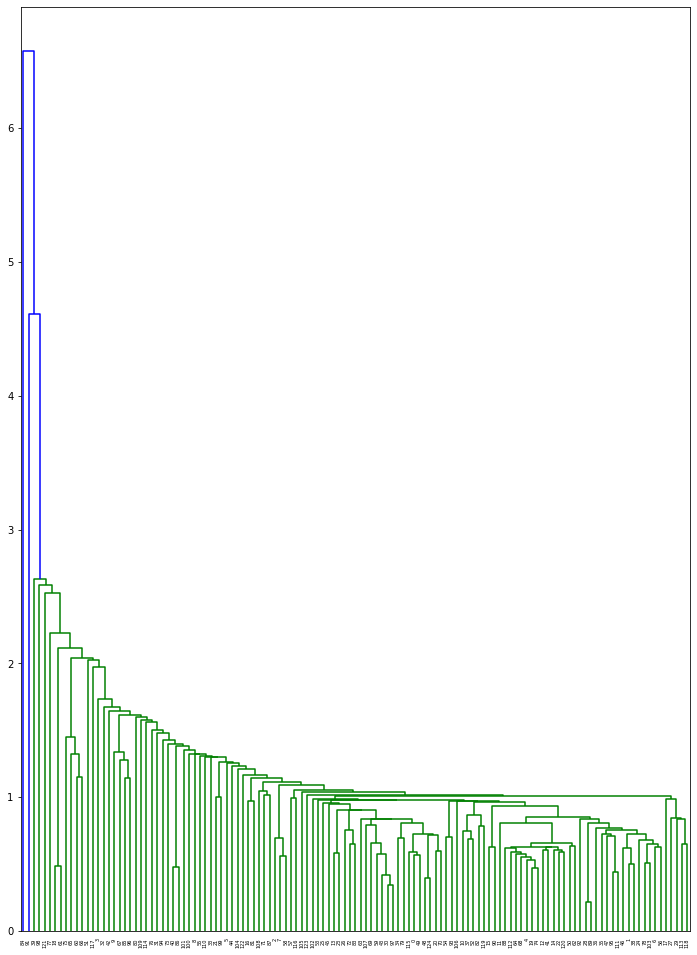

In [305]:
mergings=linkage(df_Hie,method="single",metric="euclidean")
dendrogram(mergings)
plt.show

### Single linkage is a metric that uses the maximum distance between two observations to assign them to a cluster.

<function matplotlib.pyplot.show(*args, **kw)>

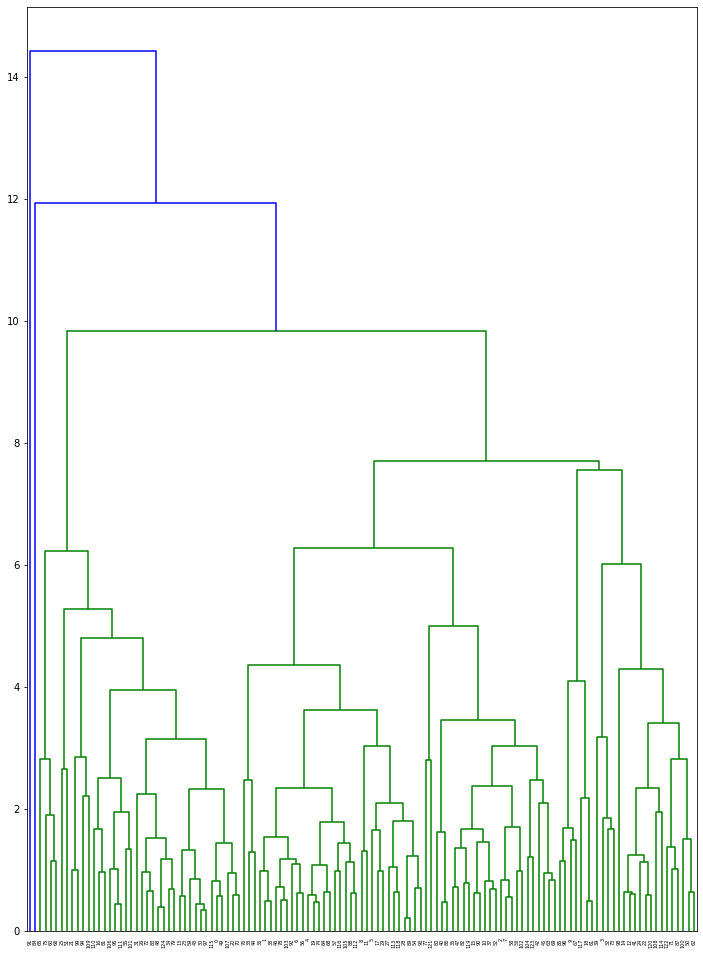

In [306]:
mergings=linkage(df_Hie,method="complete",metric="euclidean")
dendrogram(mergings)
plt.show

#### Complete linkage uses the max distance to make initial clusters, from the dendogram above we can make a choice of number of clusters for further ananlysis

## create clusters: we will divide our data in to 3 clusters

In [319]:
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)

In [320]:
#assign cluster lables to the Dataframe
df_Hie["cluster_labels"]=cluster_labels #for hierarchical
df_Hie.head()

PC1       PC2       PC3       PC4       PC5  cluster_labels
0 -2.670307  0.240164  0.057686  0.886682 -0.125526               0
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922               0
2  0.925942  0.614654 -0.791380 -0.937885  0.117766               0
3 -1.584027  1.838481  2.074809 -1.188870  0.095283               0
4  1.914003 -1.007210  0.111139  0.077772 -0.186814               0

Text(0.5, 0.95, 'Hierarchical Clustering Principal components')

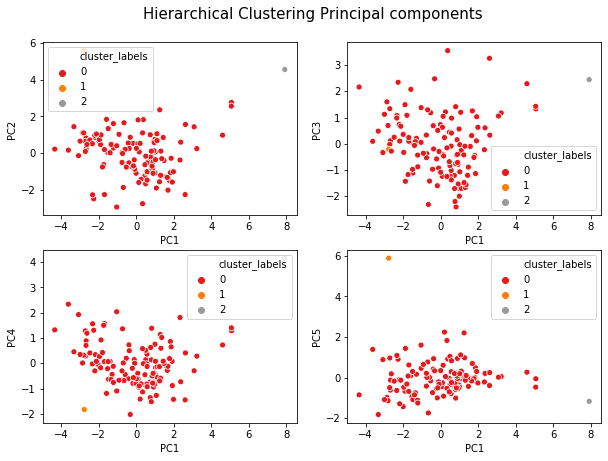

In [322]:
plt.figure(figsize=(10,7))
j=1
kmeans_cols=['PC2','PC3','PC4','PC5']
for i in kmeans_cols:
    plt.subplot(2,2,j)
    sns.scatterplot(df_Hie['PC1'],df_Hie[i],hue=df_Hie['cluster_labels'],palette="Set1")
    j+=1
plt.suptitle("Hierarchical Clustering Principal components",y=0.95,fontsize=15)

## comparing K-Means and Hierarichical visuals 

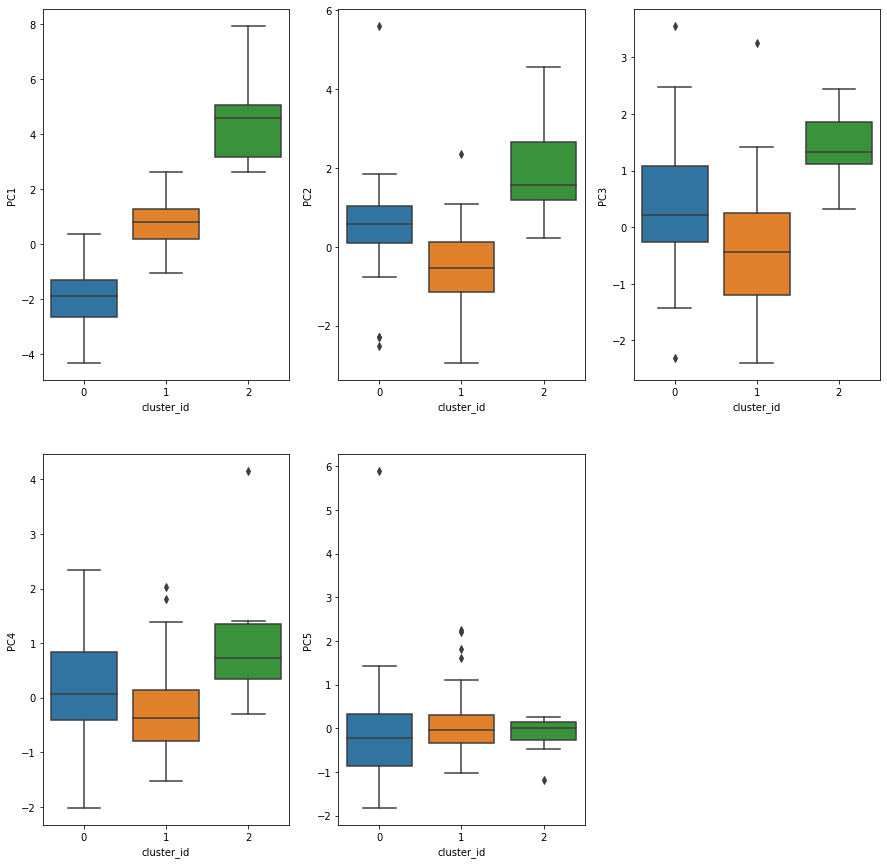

In [323]:
plt.figure(figsize=(15,15))

plt.subplot(2,3,1)
sns.boxplot(x="cluster_id",y="PC1",data=df_PCA)

plt.subplot(2,3,2)
sns.boxplot(x="cluster_id",y="PC2",data=df_PCA)

plt.subplot(2,3,3)
sns.boxplot(x="cluster_id",y="PC3",data=df_PCA)

plt.subplot(2,3,4)
sns.boxplot(x="cluster_id",y="PC4",data=df_PCA)

plt.subplot(2,3,5)
sns.boxplot(x="cluster_id",y="PC5",data=df_PCA)



In [324]:
df_PCA.describe()

PC1           PC2           PC3           PC4           PC5  \
count  1.250000e+02  1.250000e+02  1.250000e+02  1.250000e+02  1.250000e+02   
mean   2.131628e-17  6.572520e-17  3.019807e-17  2.919887e-17  3.286260e-17   
std    1.914152e+00  1.307586e+00  1.160861e+00  9.287137e-01  9.100418e-01   
min   -4.346355e+00 -2.952738e+00 -2.404969e+00 -2.020937e+00 -1.825869e+00   
25%   -1.477139e+00 -8.835381e-01 -8.773766e-01 -6.677064e-01 -4.994828e-01   
50%    1.622275e-01  9.592999e-02 -6.225209e-02 -8.822191e-02 -5.974668e-02   
75%    1.025643e+00  7.099827e-01  6.965008e-01  4.541029e-01  2.995073e-01   
max    7.927401e+00  5.596590e+00  3.549329e+00  4.150240e+00  5.892479e+00   

       cluster_id  
count  125.000000  
mean     0.688000  
std      0.573838  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      2.000000

In [325]:
### looking at the mean of each cluster will help us determine which clustering works better

In [326]:
print((df_PCA["cluster_id"]==0).mean())
print((df_PCA["cluster_id"]==1).mean())
print((df_PCA["cluster_id"]==2).mean())



0.368
0.576
0.056


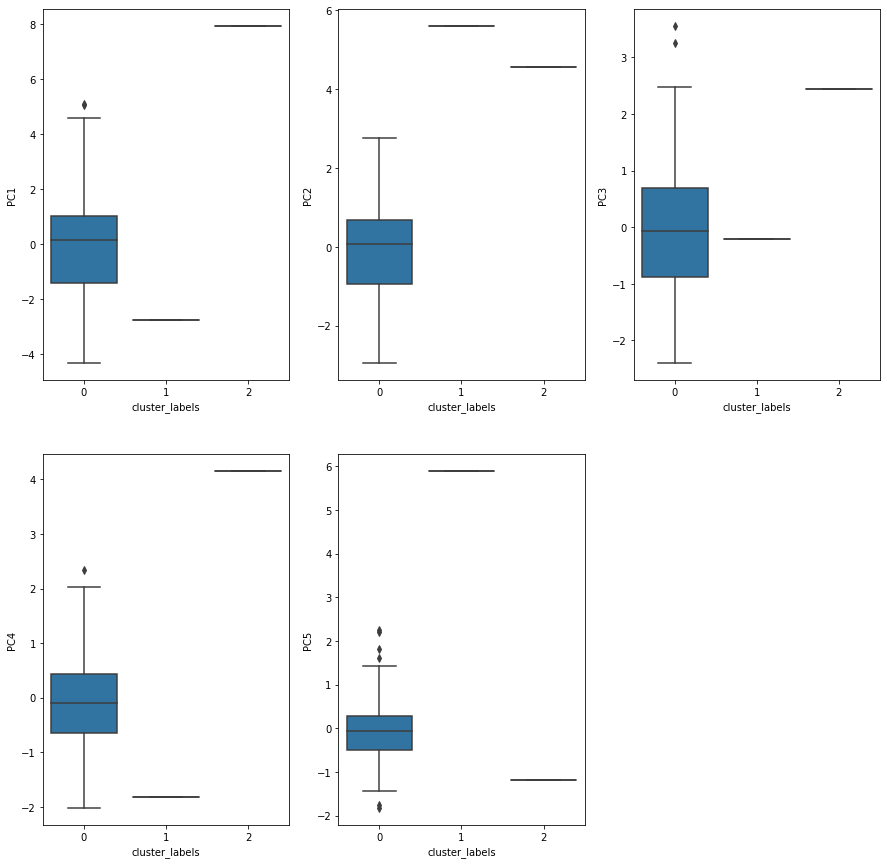

In [327]:
plt.figure(figsize=(15,15))

plt.subplot(2,3,1)
sns.boxplot(x="cluster_labels",y="PC1",data=df_Hie)

plt.subplot(2,3,2)
sns.boxplot(x="cluster_labels",y="PC2",data=df_Hie)

plt.subplot(2,3,3)
sns.boxplot(x="cluster_labels",y="PC3",data=df_Hie)

plt.subplot(2,3,4)
sns.boxplot(x="cluster_labels",y="PC4",data=df_Hie)

plt.subplot(2,3,5)
sns.boxplot(x="cluster_labels",y="PC5",data=df_Hie)



In [328]:
df_Hie.describe()

PC1           PC2           PC3           PC4           PC5  \
count  1.250000e+02  1.250000e+02  1.250000e+02  1.250000e+02  1.250000e+02   
mean   2.131628e-17  6.572520e-17  3.019807e-17  2.919887e-17  3.286260e-17   
std    1.914152e+00  1.307586e+00  1.160861e+00  9.287137e-01  9.100418e-01   
min   -4.346355e+00 -2.952738e+00 -2.404969e+00 -2.020937e+00 -1.825869e+00   
25%   -1.477139e+00 -8.835381e-01 -8.773766e-01 -6.677064e-01 -4.994828e-01   
50%    1.622275e-01  9.592999e-02 -6.225209e-02 -8.822191e-02 -5.974668e-02   
75%    1.025643e+00  7.099827e-01  6.965008e-01  4.541029e-01  2.995073e-01   
max    7.927401e+00  5.596590e+00  3.549329e+00  4.150240e+00  5.892479e+00   

       cluster_labels  
count      125.000000  
mean         0.024000  
std          0.199354  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          2.000000

In [329]:
print((df_Hie["cluster_labels"]==0).mean())
print((df_Hie["cluster_labels"]==1).mean())
print((df_Hie["cluster_labels"]==2).mean())



0.984
0.008
0.008


> After comparin K-Means and Hierarchical clustering I decided to go with K-Means clustering analysis
for the following reasons
1. The distance between the clusters indicating maximum distance between clusters
2. The IQR is smaller indicating tighter clusters

In [330]:
df_PCA.head()

PC1       PC2       PC3       PC4       PC5  cluster_id
0 -2.670307  0.240164  0.057686  0.886682 -0.125526           0
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922           1
2  0.925942  0.614654 -0.791380 -0.937885  0.117766           1
3 -1.584027  1.838481  2.074809 -1.188870  0.095283           0
4  1.914003 -1.007210  0.111139  0.077772 -0.186814           1

In [337]:
PCA_Clust=pd.concat([df_PCA,country,df_2],axis=1)

In [338]:
PCA_Clust.head()

PC1       PC2       PC3       PC4       PC5  cluster_id  \
0 -2.670307  0.240164  0.057686  0.886682 -0.125526         0.0   
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922         1.0   
2  0.925942  0.614654 -0.791380 -0.937885  0.117766         1.0   
3 -1.584027  1.838481  2.074809 -1.188870  0.095283         0.0   
4  1.914003 -1.007210  0.111139  0.077772 -0.186814         1.0   

               country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1              Albania        16.6     28.0    6.55     48.6   9930.0   
2              Algeria        27.3     38.4    4.17     31.4  12900.0   
3               Angola       119.0     62.3    2.85     42.9   5900.0   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

In [339]:
PCA_Clust.head()

PC1       PC2       PC3       PC4       PC5  cluster_id  \
0 -2.670307  0.240164  0.057686  0.886682 -0.125526         0.0   
1  1.025643 -1.071464 -1.069550 -0.167316 -0.058922         1.0   
2  0.925942  0.614654 -0.791380 -0.937885  0.117766         1.0   
3 -1.584027  1.838481  2.074809 -1.188870  0.095283         0.0   
4  1.914003 -1.007210  0.111139  0.077772 -0.186814         1.0   

               country  child_mort  exports  health  imports   income  \
0          Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1              Albania        16.6     28.0    6.55     48.6   9930.0   
2              Algeria        27.3     38.4    4.17     31.4  12900.0   
3               Angola       119.0     62.3    2.85     42.9   5900.0   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

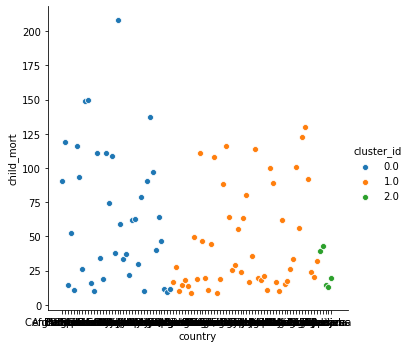

In [340]:
sns.pairplot(data=PCA_Clust, x_vars=["country"], y_vars=["child_mort"], hue = "cluster_id", size=5)

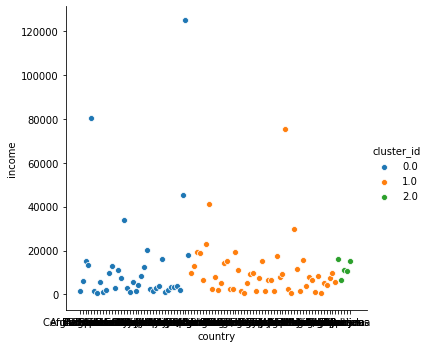

In [341]:
sns.pairplot(data=PCA_Clust, x_vars=["country"], y_vars=["income"], hue = "cluster_id", size=5)

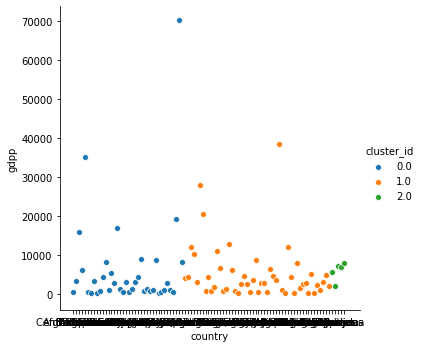

In [342]:
sns.pairplot(data=PCA_Clust, x_vars=["country"], y_vars=["gdpp"], hue = "cluster_id", size=5)

In [343]:
PCA_Clust[PCA_Clust["cluster_id"]==0].shape

(46, 16)

In [344]:
PCA_Clust[PCA_Clust["cluster_id"]==1].shape

(72, 16)

In [345]:
PCA_Clust[PCA_Clust["cluster_id"]==2].shape

(7, 16)

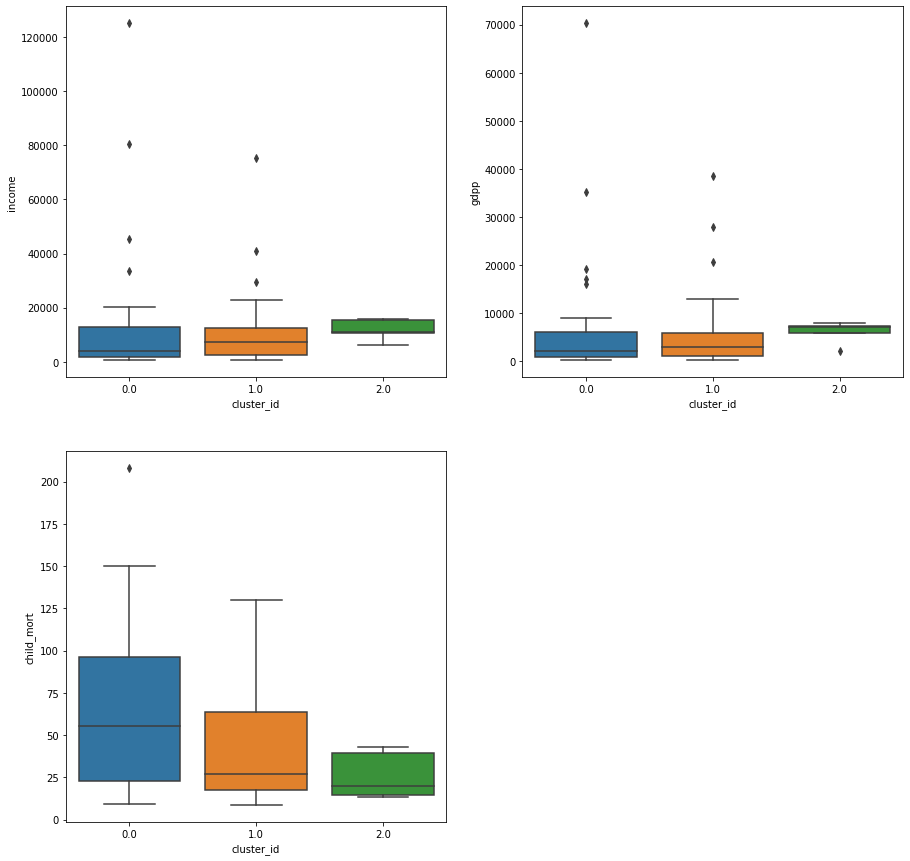

In [346]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.boxplot(x="cluster_id",y="income",data=PCA_Clust)

plt.subplot(2,2,2)
sns.boxplot(x="cluster_id",y="gdpp",data=PCA_Clust)

plt.subplot(2,2,3)
sns.boxplot(x="cluster_id",y="child_mort",data=PCA_Clust)



### Cluster 1 has Low income and per-capita gdp and a high maximum for Child-Mortality so we have to pick out 5 countries from this cluster.


In [347]:
PCA_Clust_1=PCA_Clust[PCA_Clust["cluster_id"]==0]

In [348]:
PCA_Clust_1.head()

PC1       PC2       PC3       PC4       PC5  cluster_id      country  \
0  -2.670307  0.240164  0.057686  0.886682 -0.125526         0.0  Afghanistan   
3  -1.584027  1.838481  2.074809 -1.188870  0.095283         0.0       Angola   
13 -1.993952  0.667200  0.357791 -0.088222 -1.436119         0.0     Barbados   
20 -2.676987  0.820994  0.111129  0.705103 -0.618688         0.0          NaN   
21 -3.075442 -0.148428 -0.334317  1.922062  0.881523         0.0     Botswana   

    child_mort  exports  health  imports   income  inflation  life_expec  \
0         90.2     10.0    7.58     44.9   1610.0      9.440        56.2   
3        119.0     62.3    2.85     42.9   5900.0     22.400        60.1   
13        14.2     39.5    7.97     48.7  15300.0      0.321        76.7   
20         NaN      NaN     NaN      NaN      NaN        NaN         NaN   
21        52.5     43.6    8.30     51.3  13300.0      8.920        57.1   

    total_fer     gdpp  
0        5.82    553.0  
3        6.16   3530.0  
13       1.78  16000.0  
20        NaN      NaN  
21       2.88   6350.0

In [349]:
PCA_Clust_1=PCA_Clust_1.filter(["country","child_mort","income","gdpp","cluster_id"])

In [350]:
PCA_Clust_1.head()

country  child_mort   income     gdpp  cluster_id
0   Afghanistan        90.2   1610.0    553.0         0.0
3        Angola       119.0   5900.0   3530.0         0.0
13     Barbados        14.2  15300.0  16000.0         0.0
20          NaN         NaN      NaN      NaN         0.0
21     Botswana        52.5  13300.0   6350.0         0.0

### Which countries need the aid?


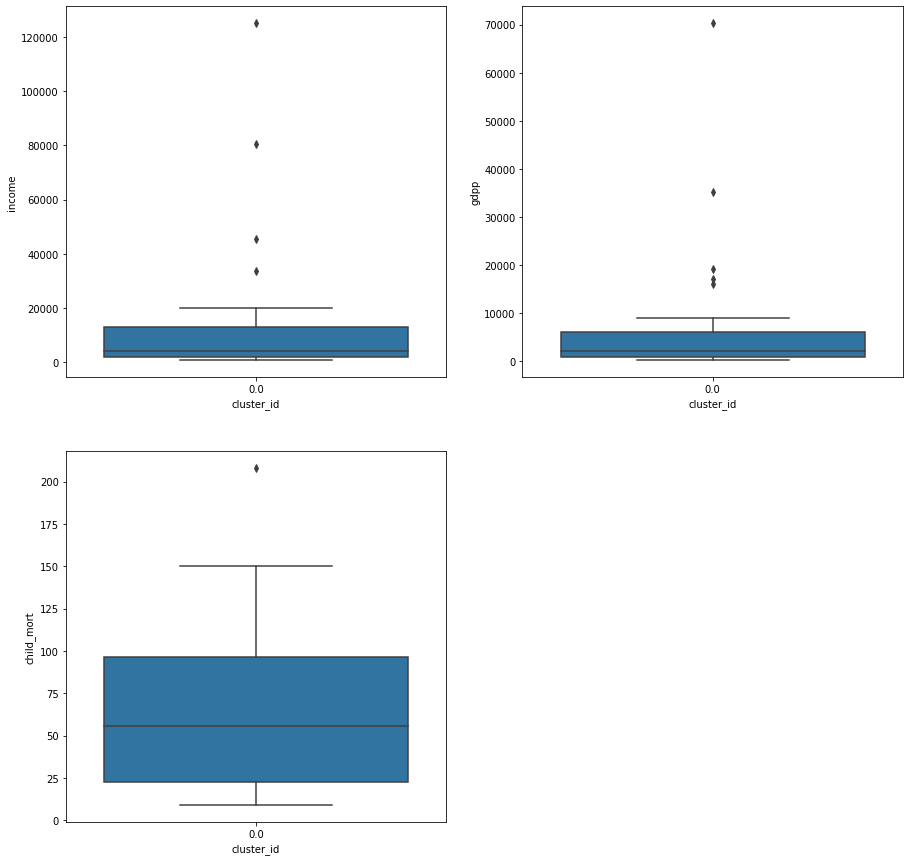

In [351]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.boxplot(x="cluster_id",y="income",data=PCA_Clust_1)

plt.subplot(2,2,2)
sns.boxplot(x="cluster_id",y="gdpp",data=PCA_Clust_1)

plt.subplot(2,2,3)
sns.boxplot(x="cluster_id",y="child_mort",data=PCA_Clust_1)

### From the above it is evident that we have to get the countries that are the outliers in the child-mortality segment and the lower quartile for income and gdpp.

In [361]:
Countries=PCA_Clust_1[(PCA_Clust_1['child_mort']>PCA_Clust_1['child_mort'].quantile(0.8))&(PCA_Clust_1['income']<PCA_Clust_1['income'].quantile(0.30))&(PCA_Clust_1['gdpp']<PCA_Clust_1['gdpp'].quantile(0.30))]

In [362]:
Countries_1=PCA_Clust_1[PCA_Clust_1['child_mort']>PCA_Clust_1['child_mort'].quantile(0.1)]

In [363]:
Countries_1.sort_values(["child_mort"],ascending=False).head()

country  child_mort  income    gdpp  cluster_id
66                     Haiti       208.0  1500.0   662.0         0.0
32                      Chad       150.0  1930.0   897.0         0.0
31  Central African Republic       149.0   888.0   446.0         0.0
97                      Mali       137.0  1870.0   708.0         0.0
3                     Angola       119.0  5900.0  3530.0         0.0

### Though Haiti has the highest child mortality rate it does not show up in the final list as that country has a higher income per person than many other countries.

In [365]:
Countries_I.sort_values(["income"],ascending=True).head()

country  child_mort  income   gdpp  cluster_id
26                   Burundi        93.6   764.0  231.0         0.0
31  Central African Republic       149.0   888.0  446.0         0.0
94                    Malawi        90.5  1030.0  459.0         0.0
63                    Guinea       109.0  1190.0  648.0         0.0

In [366]:
Countries.shape

(5, 5)

### Liberia and Burundi are doing well with child-mortality in spite of their lower INCOME and GDPP

In [367]:
Countries.head()

country  child_mort  income   gdpp  cluster_id
25              Burkina Faso       116.0  1430.0  575.0         0.0
31  Central African Republic       149.0   888.0  446.0         0.0
32                      Chad       150.0  1930.0  897.0         0.0
66                     Haiti       208.0  1500.0  662.0         0.0
97                      Mali       137.0  1870.0  708.0         0.0

In [368]:
print(list(Countries["country"]))

['Burkina Faso', 'Central African Republic', 'Chad', 'Haiti', 'Mali']


## The countires that are in dire need of the aid are 
#### 1.Burkina Faso
#### 2. Central African Republic
#### 3.Chad
#### 4.Haiti
#### 5.Mali

